In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from statsmodels.stats.multitest import multipletests
from magicbox.algorithm.plot import MidpointNormalize
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/RSM')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# show image for 一般矩阵

In [2]:
def plot_mat(fpath, rows, cols, mtc, out_file, figsize, title, show_value, show_name, show_grid, show_cbar):
    """
    show image for 对称矩阵

    Args:
        fpath ([type]): [description]
        rows ([type]): [description]
        cols ([type]): [description]
        mtc ([type]): [description]
        out_file ([type]): [description]
        figsize ([type]): [description]
        title ([type]): [description]
        show_value ([type]): [description]
        show_name ([type]): [description]
        show_grid ([type]): [description]
        show_cbar ([type]): [description]
    """
    data = pkl.load(open(fpath, 'rb'))
    if rows == 'all':
        rows = data['row_name']
    n_row = len(rows)
    if cols == 'all':
        cols = data['col_name']
    n_col = len(cols)
    row_indices = [data['row_name'].index(i) for i in rows]
    col_indices = [data['col_name'].index(i) for i in cols]
    r_arr = data['r'][row_indices][:, col_indices]
    p_arr = data['p'][row_indices][:, col_indices]
    if mtc:
        for row_idx in range(n_row):
            reject, p_arr[row_idx], alpha_sidak, alpha_bonf = \
                multipletests(p_arr[row_idx], 0.05, 'fdr_bh')
    p_mask = p_arr < 0.05

    fig, ax = plt.subplots(figsize=figsize)
    xticks = np.arange(n_col)
    yticks = np.arange(n_row)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    if show_cbar:
        fig.colorbar(img)
    if show_name:
        ax.set_xticks(xticks)
        ax.set_xticklabels(cols)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(yticks)
        ax.set_yticklabels(rows)
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_xticks = np.r_[xticks-.5, xticks[-1]+.5]
        grid_yticks = np.r_[yticks-.5, yticks[-1]+.5]
        ax.set_xticks(grid_xticks, minor=True)
        ax.set_yticks(grid_yticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_row):
            for j in range(n_col):
                # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
                if np.isnan(r_arr[i, j]):
                    continue

                if p_mask[i, j]:
                    weight = 'bold'
                else:
                    weight = None

                ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                        ha="center", va="center", color="k", weight=weight)

    fig.tight_layout()
    if out_file is None:
        fig.show()
    else:
        fig.savefig(out_file)

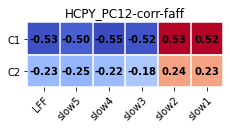

In [7]:
fname = 'HCPY_PC12-corr-faff'
fpath = pjoin(anal_dir, f'RSM/{fname}.pkl')
plot_mat(
    fpath=fpath, rows='all', cols='all', mtc=False, 
    out_file=pjoin(work_dir, f"{fname}.jpg"),
    figsize=(3.3, 6.6), title=fname, show_name=True,
    show_value=True, show_grid=True, show_cbar=False)

# show image for 对称矩阵

In [2]:
def plot_sym_mat(fpath, items, mtc, out_file, figsize, title, show_value, show_name, show_grid, show_cbar):
    """
    show image for 对称矩阵

    Args:
        fpath ([type]): [description]
        items ([type]): [description]
        mtc ([type]): [description]
        out_file ([type]): [description]
        figsize ([type]): [description]
        title ([type]): [description]
        show_value ([type]): [description]
        show_name ([type]): [description]
        show_grid ([type]): [description]
        show_cbar ([type]): [description]
    """
    data = pkl.load(open(fpath, 'rb'))
    assert data['row_name'] == data['col_name']
    if items == 'all':
        items = data['row_name']
    n_item = len(items)
    item_indices = [data['row_name'].index(i) for i in items]
    r_arr = data['r'][item_indices][:, item_indices]
    p_arr = data['p'][item_indices][:, item_indices]
    diag_mask = np.eye(n_item, dtype=bool)
    if mtc:
        tril_mask = np.tri(n_item, k=-1, dtype=bool)
        reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
            multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')

        triu_mask = tril_mask.T
        p_arr[triu_mask] = p_arr.T[triu_mask]
    p_mask = p_arr < 0.05

    # r_arr = np.ma.array(data['r'], mask=diag_mask)
    r_arr[diag_mask] = np.nan
    fig, ax = plt.subplots(figsize=figsize)
    ticks = np.arange(n_item)
    img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
    if show_cbar:
        fig.colorbar(img)
    if show_name:
        ax.set_xticks(ticks)
        ax.set_xticklabels(items)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
        ax.set_yticks(ticks)
        ax.set_yticklabels(items)
    else:
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    if show_grid:
        grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
        ax.set_xticks(grid_ticks, minor=True)
        ax.set_yticks(grid_ticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

    if show_value:
        for i in range(n_item):
            for j in range(n_item):
                # if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
                if np.isnan(r_arr[i, j]):
                    continue

                if p_mask[i, j]:
                    weight = 'bold'
                else:
                    weight = None

                ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                        ha="center", va="center", color="k", weight=weight)

    fig.tight_layout()
    if out_file is None:
        fig.show()
    else:
        fig.savefig(out_file)

MMP-vis3-R-early2
MMP-vis3-R-early2_R2
MMP-vis3-R-later2
MMP-vis3-R-later2_R2
MMP-vis3-R_PC1-N2-1
MMP-vis3-R_PC1-N2-1_R2
MMP-vis3-R_PC1-N2-2
MMP-vis3-R_PC1-N2-2_R2
MMP-vis3-R
MMP-vis3-R_R2


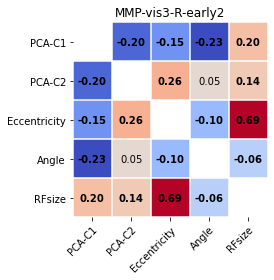

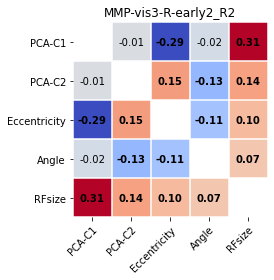

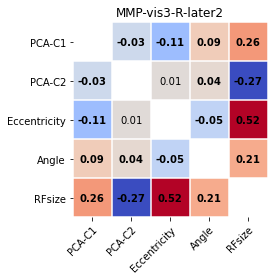

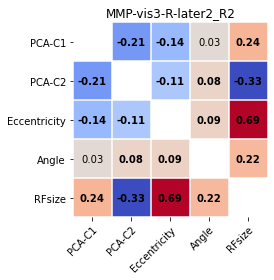

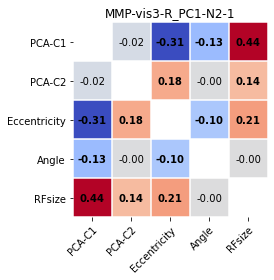

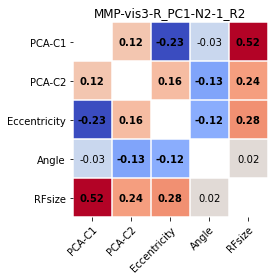

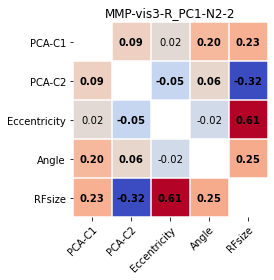

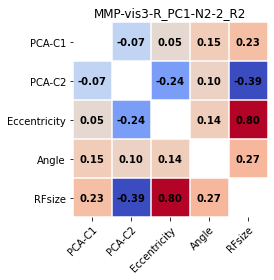

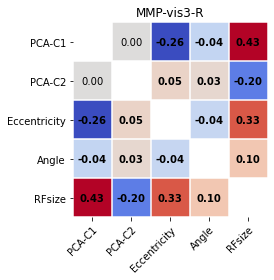

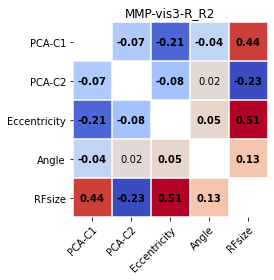

In [5]:
fnames = [
    'MMP-vis3-R-early2', 'MMP-vis3-R-early2_R2', 'MMP-vis3-R-later2',
    'MMP-vis3-R-later2_R2', 'MMP-vis3-R_PC1-N2-1', 'MMP-vis3-R_PC1-N2-1_R2',
    'MMP-vis3-R_PC1-N2-2', 'MMP-vis3-R_PC1-N2-2_R2', 'MMP-vis3-R', 'MMP-vis3-R_R2'
]
items = ('PCA-C1', 'PCA-C2', 'Eccentricity', 'Angle', 'RFsize')

for fname in fnames:
    fpath = pjoin(anal_dir, f'RSM/RSM_{fname}.pkl')
    print(fname)
    plot_sym_mat(
        fpath=fpath, items=items, mtc=True,
        out_file=pjoin(work_dir, f"{fname}.jpg"),
        figsize=(4, 4), title=fname, show_name=True,
        show_value=True, show_grid=True, show_cbar=False)